In [1]:
import os
ROOT_DIR = os.path.abspath("../../../..")
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
class_names = ['master_chef_can', 'cracker_box',
               'sugar_box', 'tomato_soup_can', 'mustard_bottle',
               'tuna_fish_can', 'pudding_box', 'gelatin_box',
               'potted_meat_can', 'banana', 'pitcher_base',
               'bleach_cleanser', 'bowl',
               'mug', 'power_drill',
               'wood_block', 'scissors',
               'large_marker', 'large_clamp',
               'extra_large_clamp', 'foam_brick']

In [3]:
data_dir = os.path.join(ROOT_DIR, '50_images')
#Training sample image distribution
train_dir = os.path.join(data_dir, 'train')
with open(train_dir + '/scene_gt.json', 'r') as f:
    data = json.load(f)

In [6]:
with open('/home/incendio/Desktop/train_count.json', 'r') as f:
    train_data = json.load(f)
with open('/home/incendio/Desktop/test_count.json', 'r') as f:
    test_data = json.load(f)
with open('/home/incendio/Desktop/val_cound.json', 'r') as f:
    val_data = json.load(f)

In [4]:
object_ids = []
for image_id in list(data.keys()):
    obj_id = [i['obj_id'] for i in data[image_id]]
    object_ids.append(obj_id)

In [20]:
count = Counter()
for id_ in object_ids:
    count[id_[0]] += 1

In [64]:
test_data

{'01': 41,
 '19': 44,
 '18': 41,
 '12': 45,
 '09': 57,
 '03': 56,
 '11': 52,
 '10': 50,
 '08': 43,
 '02': 60,
 '16': 49,
 '20': 44,
 '04': 47,
 '21': 53,
 '05': 54,
 '06': 32,
 '14': 42,
 '15': 53,
 '07': 46,
 '13': 44,
 '17': 47}

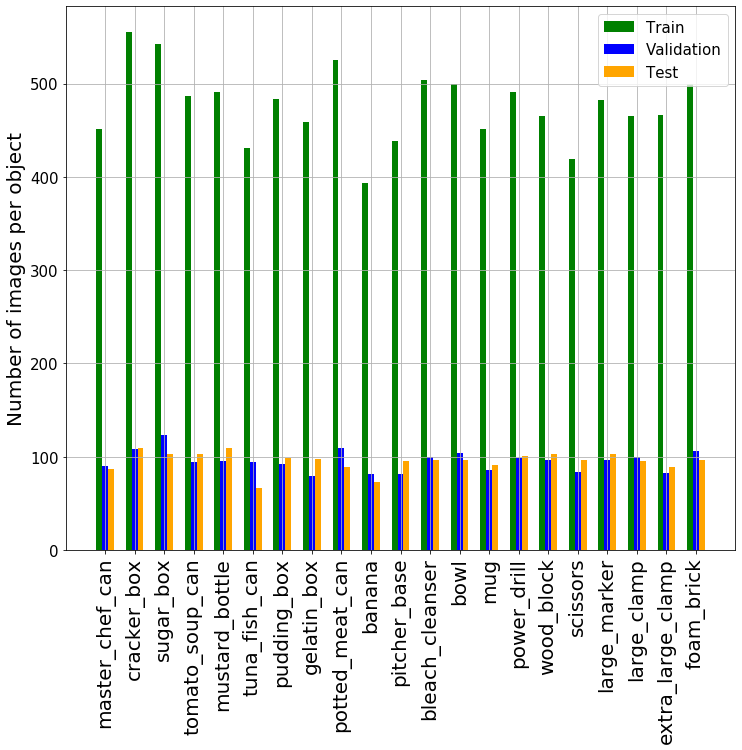

In [7]:
fig, ax = plt.subplots(figsize=(12, 10))
# fig.canvas.draw()
width = 0.2
x_ticks = []
for i in range(21):
    x_ticks.append(class_names[i])
train_keys = list(map(float, list(train_data.keys())))
train_keys = [i - width for i in train_keys]
val_keys = list(map(float, list(val_data.keys())))
val_keys = [i for i in val_keys]
test_keys = list(map(float, list(test_data.keys())))
test_keys = [i + width for i in test_keys]
plt.bar(train_keys, train_data.values(), width, color='g', label='Train')
plt.bar(val_keys, val_data.values(), width, color='b', label='Validation')
plt.bar(test_keys, test_data.values(), width, color='orange', label='Test')
# sns.histplot(data=train_data, bins=21, binwidth=2)
ind = np.arange(1, 22)
plt.yticks(fontsize=15)
ax.set_xticks(ind)
ax.set_xticklabels(x_ticks, rotation='vertical', fontsize=20)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fontsize=15)
plt.ylabel('Number of images per object', fontsize=20)
plt.grid()
# plt.title('Number of images per object', fontsize=20)
plt.show()